## K-Fold Cross Validation (Kernel SVM)

We can always imporve a model by changing the hyper parameters. Since these parameters are not learned parameters we need to findd a another way to choose them. But before we choose these parameters we need to find a way of evaluating our model. We do split the data and train the model on the training set and test it on the test set. This a good way to evaluating the model, but we can do better.

We have the variance problem where the model may provide a good accuracy on 1 test set but may not perform very well on another test set. So judging the model performance on just 1 test set is not optimal. 

We can use the K-Fold Cross Validation to fix the variance problem. We will split the training data set into k rows and into k-folds and we train the data on k-1 folds and test the data on the kth fold of each row. This will give us a much better idea of the performance of the model. We can get an accuracy for each k-fold and then calculate the meanand standard deviation of thr accuracies.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Increasing the size of all graphs 
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
# Suppressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset into variables
dataset = pd.read_csv('Social_Network_Ads.csv')
rows, columns = dataset.shape
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, (columns - 1)].values
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


We are going to look at the Age and the EstimatedSalary of the users in the data set and predict if they will purchase the SUV.

In [4]:
# Checking the values of X and y
print("X Values")
print(["{0:0.2f}".format(i) for i in X[0,:]])
print("\nY Values")
print(y[:10])

X Values
['19.00', '19000.00']

Y Values
[0 0 0 0 0 0 0 1 0 0]


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0)

In [6]:
# Feature Scaling
# We need to apply feature scaling because we want accurate results.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
# Fitting classifier to the Training Set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Predicting the Test Set results
y_pred = classifier.predict(X_test)
print("y_test Values:", y_test)                            
print("\ny_pred Values:", y_pred)

y_test Values: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]

y_pred Values: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


###### Evalutating the Model performance

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In the above confusion matrix we can see that the model has predicted 64+29 = 93 correct prediction and 3+4 = 7 wrong predictions which are a fairly good results

In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tn+tp)/(tn + fp + fn + tp) * 100
print("Accuracy: ",accuracy,"%")

Accuracy:  93.0 %


###### Applying K-Fold Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Accuracies: ",accuracies)
print("Accuracies Mean: ",accuracies.mean())
print("Accuracies SD: ",accuracies.std())

Accuracies:  [ 0.80645161  0.96666667  0.8         0.93333333  0.86666667  0.83333333
  0.93333333  0.93333333  0.96666667  0.96551724]
Accuracies Mean:  0.900530218762
Accuracies SD:  0.0638895735663


###### Visualising the Training set results

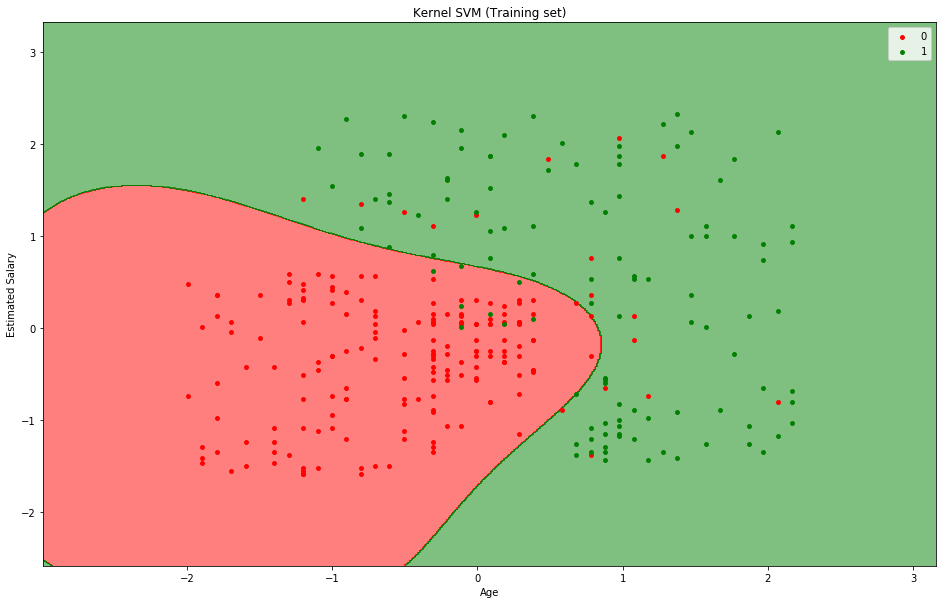

In [12]:
# This library helps us colorize our data points 
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = 16, 10
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1,
              step=0.01))
# This function makes the contour between the two regions.
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(
                 X1.shape),
             alpha=0.50, cmap=ListedColormap(('red', 'green')))
# Here we plot the graph values
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Here we print the actual values of the training set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j,s=15)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

###### Visualising the Test set results

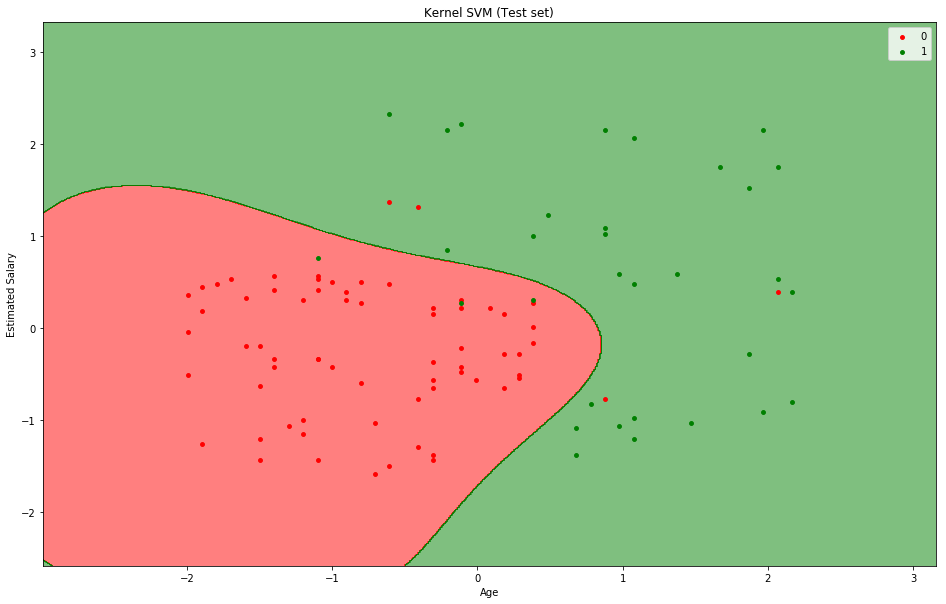

In [13]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1,
              step=0.01))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(
                 X1.shape),
             alpha=0.50, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j,s=15)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()